In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Read files
df_sd = pd.read_csv("../../../02_Data//02_SociaDemographics/us_final.csv",index_col=0)
df_sd = df_sd.reset_index()
print(df_sd.head(10))

   index  fips           county    state state_code  median_age_2017  \
0      1  1001   Autauga County  Alabama         AL             37.8   
1      2  1003   Baldwin County  Alabama         AL             42.8   
2      3  1005   Barbour County  Alabama         AL             39.9   
3      4  1007      Bibb County  Alabama         AL             39.9   
4      5  1009    Blount County  Alabama         AL             40.8   
5      6  1011   Bullock County  Alabama         AL             39.6   
6      7  1013    Butler County  Alabama         AL             40.7   
7      8  1015   Calhoun County  Alabama         AL             39.7   
8      9  1017  Chambers County  Alabama         AL             43.0   
9     10  1019  Cherokee County  Alabama         AL             45.9   

   population_2017  female_percentage_2017        lat       long  ...  \
0            55200               51.315217  32.534923 -86.642730  ...   
1           208107               51.376936  30.727479 -87.722

# Section 1: Basic sociodemographics

In [3]:
print(df_sd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   3220 non-null   int64  
 1   fips                    3220 non-null   int64  
 2   county                  3220 non-null   object 
 3   state                   3220 non-null   object 
 4   state_code              3141 non-null   object 
 5   median_age_2017         3220 non-null   float64
 6   population_2017         3220 non-null   int64  
 7   female_percentage_2017  3220 non-null   float64
 8   lat                     3220 non-null   float64
 9   long                    3220 non-null   float64
 10  Race_Hispanic           3220 non-null   float64
 11  Race_White              3220 non-null   float64
 12  Race_Black              3220 non-null   float64
 13  Race_Native             3220 non-null   float64
 14  Race_Asian              3220 non-null   

In [4]:
df_sd.loc[549,'ChildPoverty'] = df_sd[df_sd["state"]=="Hawaii"]["ChildPoverty"].median()

In [5]:
df_missing_crime = df_sd[df_sd["crime_rate_per_100000"].isnull()]
df_missing_crime_num = df_missing_crime.groupby("state")["state"].count()

crime_columns = ["crime_rate_per_100000","IDNO","Crime_CPOPARST","Crime_CPOPCRIM","Crime_AG_OFF","Crime_COVIND","Crime_MODINDX","Crime_MURDER","Crime_RAPE","Crime_ROBBERY","Crime_AGASSLT","Crime_BURGLRY","Crime_LARCENY","Crime_MVTHEFT","Crime_ARSON"]
state_list = ["Alaska","New Mexico","South Dakota"]
for state in state_list:
    index_list = df_missing_crime[df_missing_crime['state']==state]["index"].tolist()
    for crime in crime_columns:
        for index in index_list:
            df_sd.loc[index-1,crime] = df_sd[df_sd['state']==state][crime].median()

## 1, What are missing values?
state_code: The missing values are from Puerto Rico

ChildPoverty: The missing value is from fips=15005 (Hawaii). I filled the median value in Hawaii county to it

Crime variables: Alaska(7), New Mexico(1), South Dakota(1), Puerto Rico(78). I filled the missing values in Alaska, New Mexico and South Dakota with median value respectively

## 2, Patterns of features
### 2.1 Median_age
### 2.2 Population
### 2.3 Female Percentage
### 2.4 Race
### 2.5 Income


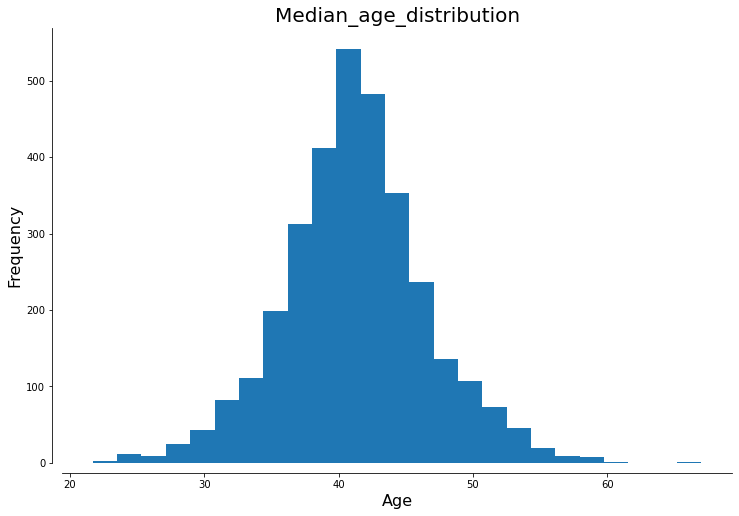

In [12]:
plt.figure(figsize=(12,8))
plt.hist(df_sd['median_age_2017'].tolist(),bins=25)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Median_age_distribution",fontsize=20)
sns.despine(offset=10)
plt.show()

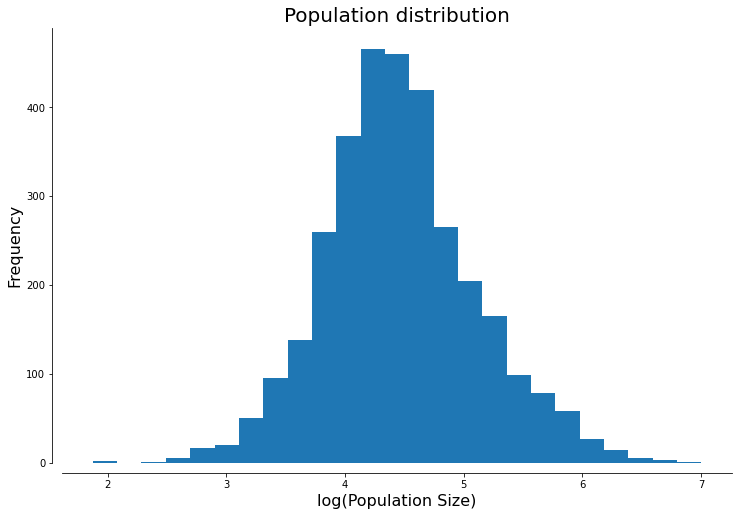

In [18]:
plt.figure(figsize=(12,8))
plt.hist(np.log10(df_sd['population_2017'].tolist()),bins=25)
plt.xlabel("log(Population Size)", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Population distribution",fontsize=20)
sns.despine(offset=10)
plt.show()

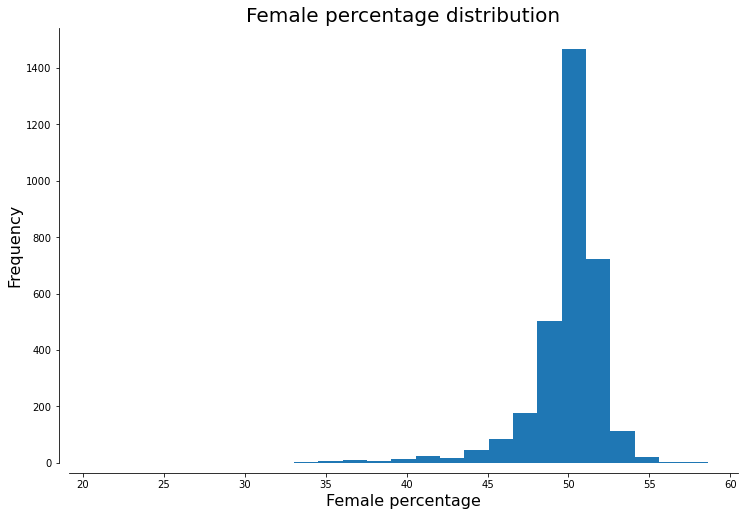

In [19]:
plt.figure(figsize=(12,8))
plt.hist(df_sd['female_percentage_2017'].tolist(),bins=25)
plt.xlabel("Female percentage", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Female percentage distribution",fontsize=20)
sns.despine(offset=10)
plt.show()

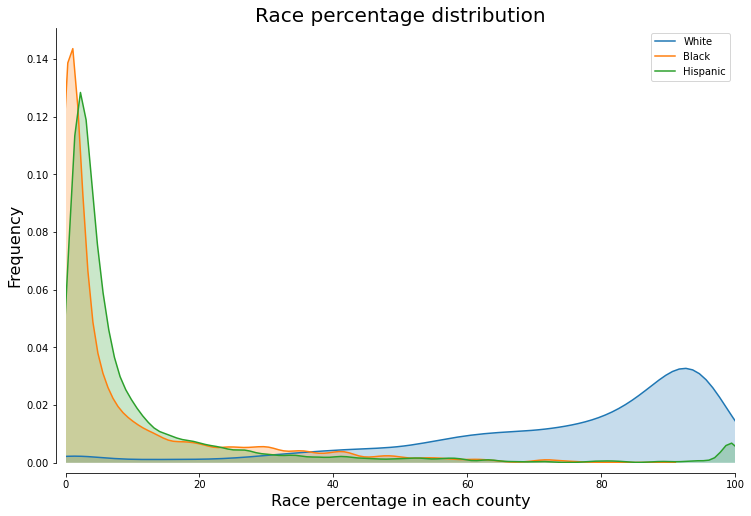

In [33]:
plt.figure(figsize=(12,8))
# plt.hist(df_sd['Race_White'].tolist(),bins=50,alpha=0.3,color="blue")
sns.kdeplot(df_sd['Race_White'].tolist(),shade=True,label="White")
sns.kdeplot(df_sd['Race_Black'].tolist(),shade=True,label="Black")
sns.kdeplot(df_sd['Race_Hispanic'].tolist(),shade=True,label="Hispanic")
# sns.kdeplot(df_sd['Race_Native'].tolist(),shade=True)
# sns.kdeplot(df_sd['Race_Asian'].tolist(),shade=True)
# plt.hist(df_sd['Race_Black'].tolist(),bins=50,alpha=0.3,color="red")
# plt.hist(df_sd['Race_Hispanic'].tolist(),bins=50,alpha=0.3,color="green")
plt.xlim(0,100)
plt.xlabel("Race percentage in each county", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Race percentage distribution",fontsize=20)
sns.despine(offset=10)
plt.show()

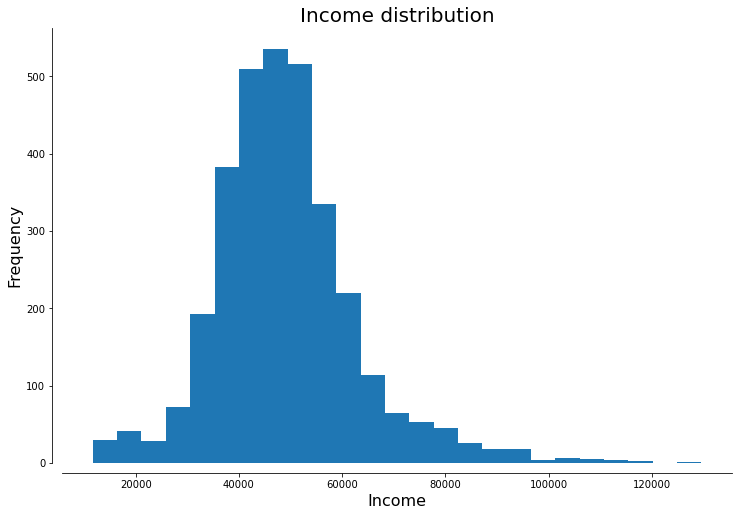

In [35]:
plt.figure(figsize=(12,8))
plt.hist(df_sd['Income'].tolist(),bins=25)
plt.xlabel("Income", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Income distribution",fontsize=20)
sns.despine(offset=10)
plt.show()

# Section 2 correlations

1, The higher the median age, the higher ratio of white people in a county, the less hispanic people in a county

2, The higher the median age, the higher ratio of self-employed

3, The larger the population size, the higher ratio of Asian in a county.

4, The larger the population size, the higher income and percap income; 

5, The larger the population size, the higher professional workers; the less construction workers;

6, The larger the population size, the higher ratio of people taking public transit.

7, While the longitude increase, the female percentage is larger.

8, The larger female percentage, the more are choosing to drive; the liss are choosing to walk

9, While the latitude increase, the lower ratio of hispanic people and the higher ratio of white people.

10, While the latitude increase, the higher income; the less unemployment

<AxesSubplot:>

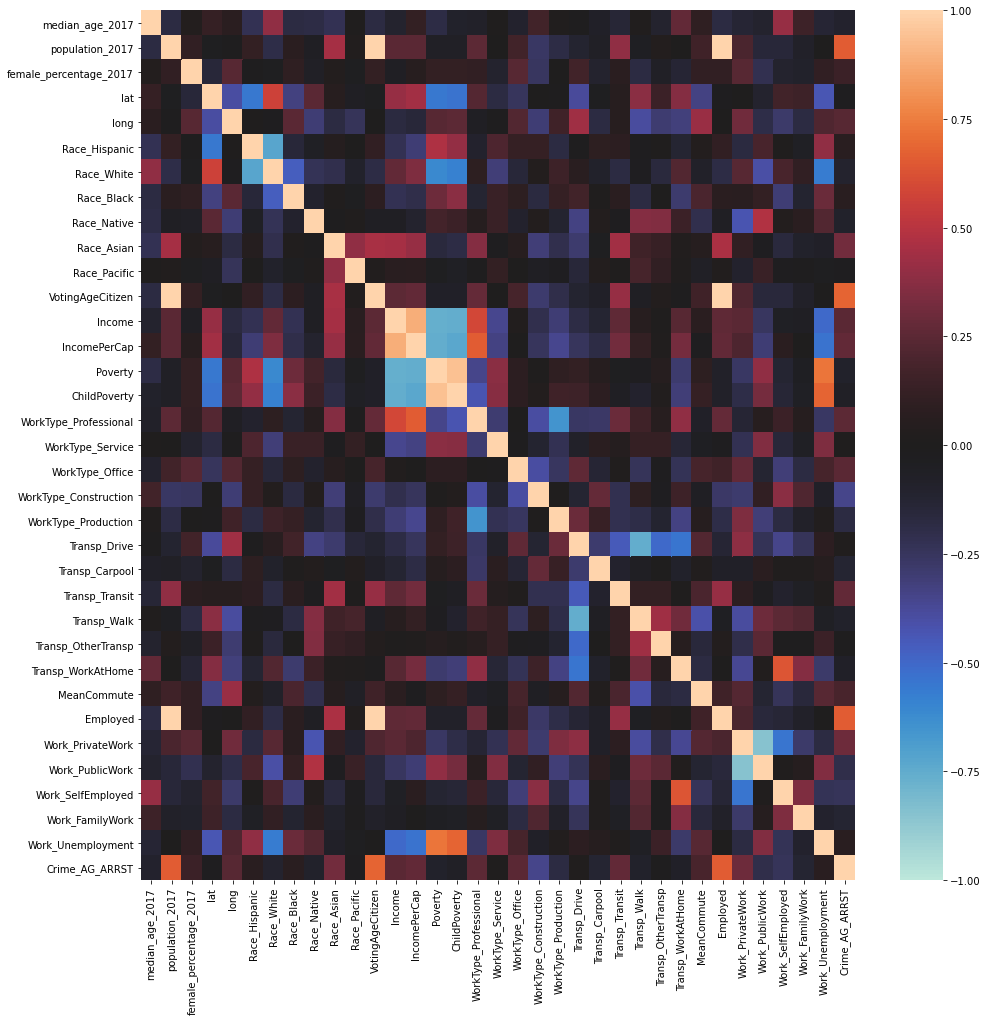

In [44]:
cor = df_sd.drop(columns=["index","fips","IncomeErr","IncomePerCapErr"]+crime_columns).corr()
plt.figure(figsize=(16,16))
sns.heatmap(cor,vmin=-1,vmax=1,center=0)